## 分類器の精度指標

In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# データロード
df = sns.load_dataset('iris')
y_col='species'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
# 予想
y_pred = model.predict(X_test)

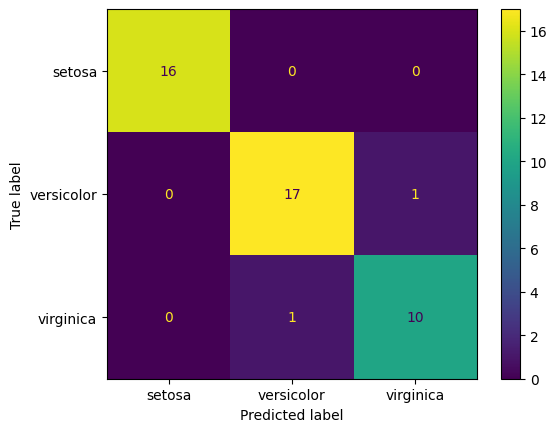

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [4]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Accuraxy

In [5]:
# サンプルデータ
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5

## Precision

In [7]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.6

## Recall 

In [8]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.6

## Specificity

In [9]:
import numpy as np
np.array(y_true) != 1

array([False, False,  True, False,  True,  True, False, False])

In [10]:
recall_score(np.array(y_true)!=1, np.array(y_pred)!=1)

0.3333333333333333

## 多クラス評価におけるPrecision

In [11]:
# データロード
df = sns.load_dataset('iris')
y_col='species'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
# 予想
y_pred = model.predict(X_test)

In [12]:
# average=None
print(precision_score(y_test, y_pred, average=None))
# verage=macro
print(precision_score(y_test, y_pred, average='macro'))
# verage=micro
print(precision_score(y_test, y_pred, average='micro'))
# same as accuracy
print(accuracy_score(y_test, y_pred))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556
0.9555555555555556


In [13]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
precision_score(y_test, y_pred, average=None).mean()

0.9511784511784511

## Precision Recall Curve

In [15]:
import pandas as pd

df = pd.read_csv('../csv/heart_preprocessed.csv')

In [16]:
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデルの構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [17]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

Text(0.5, 1.0, 'Precision Recall Curve')

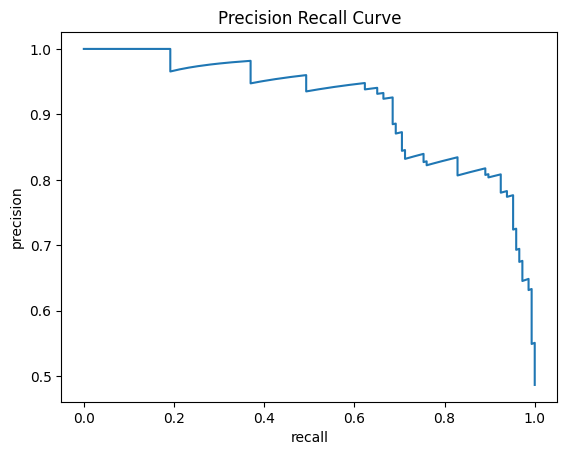

In [18]:
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')

## F値

In [19]:
from sklearn.metrics import f1_score, recall_score, precision_score
y_true = [1,0,0,1,0,0,1,1]
y_pred = [1,1,1,0,0,1,0,1]

In [20]:
f1_score(y_true, y_pred)

0.4444444444444445

In [21]:
# 調和平均

from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.4444444444444444

In [22]:
recall_score(y_true, y_pred)

0.5

In [23]:
precision_score(y_true, y_pred)

0.4

## 閾値に対してのprecision,Recall, F値の推移を描画

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [28]:
precision[-1]

1.0

In [29]:
recall[-1]

0.0

In [32]:
added_thresholds = np.append(thresholds, 1)

In [50]:
# f_value = []
# for pre_v, rec_v in zip(precision, recall):
#     hmean_v = hmean([pre_v, rec_v])
#     f_value.append(hmean_v)

In [77]:
f1_values = hmean([precision, recall])

89th threshold(=0.44) is the highest f1 score = 0.86


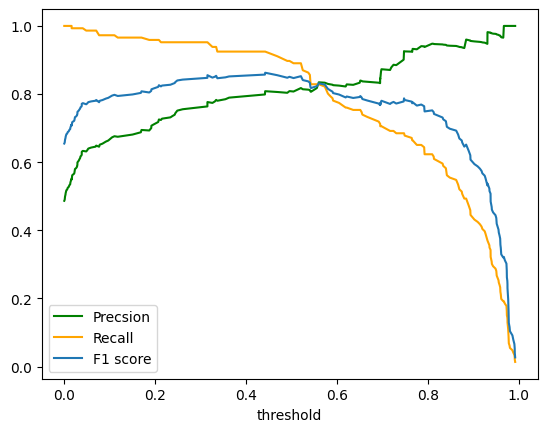

In [86]:
plt.plot(thresholds, precision[:-1], label="Precsion", color='g')
plt.plot(thresholds, recall[:-1], label="Recall", color="orange")
plt.plot(thresholds, f1_values[:-1], label="F1 score")
plt.legend()
plt.xlabel('threshold')
print(f"{np.argmax(f1_values)}th threshold(={thresholds[np.argmax(f1_values)]:.2f}) is the highest f1 score = {np.max(f1_values):.2f}")

In [80]:
np.argmax(f1_values)

89

In [83]:
thresholds[np.argmax(f1_values)]

0.44206937579178296

## ROC

In [89]:
from sklearn.metrics import roc_curve
fpr, tpr , threshold = roc_curve(y_test, y_pred_proba[:, 1])

Text(0.5, 1.0, 'ROC Curve')

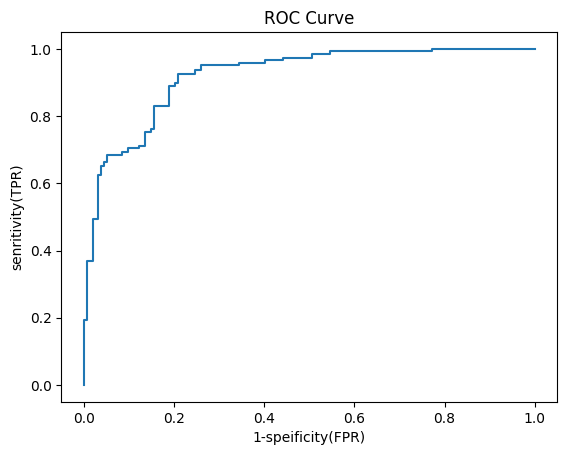

In [92]:
plt.plot(fpr, tpr)
plt.xlabel('1-speificity(FPR)')
plt.ylabel('senritivity(TPR)')
plt.title('ROC Curve')

## AUC

In [96]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9196762141967622

## 多クラスROC

### データ準備

In [147]:
# データロード
df = sns.load_dataset('iris')
y_col='species'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression()
model.fit(X_train, y_train)
# 予想
y_pred_proba = model.predict_proba(X_test)

### macro平均

In [157]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

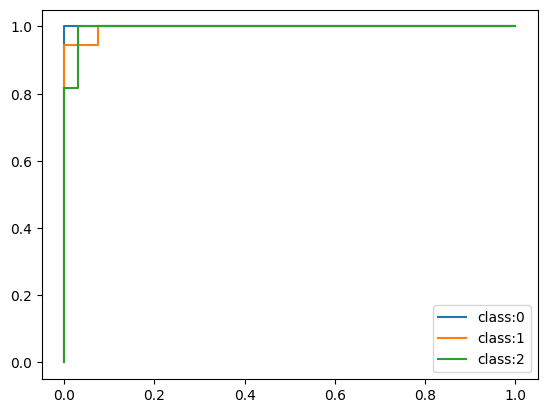

In [158]:
# それぞれのクラスのROC

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
    plt.legend()

# np.interpの例

In [154]:
all_x = np.arange(7)
data_x = [0, 2, 5, 6]
data_y = [0, 2, 4, 6]
np.interp(all_x, data_x, data_y)

array([0.        , 1.        , 2.        , 2.66666667, 3.33333333,
       4.        , 6.        ])

In [191]:
# 必要なxの値のリスト
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# 線形補完
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr = mean_tpr/n_classes
    

In [192]:
mean_tpr

array([0.92087542, 0.98148148, 1.        , 1.        ])

In [205]:
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

In [206]:
fpr

{0: array([0., 0., 0., 1.]),
 1: array([0.        , 0.        , 0.        , 0.07407407, 0.07407407,
        1.        ]),
 2: array([0.        , 0.        , 0.        , 0.02941176, 0.02941176,
        1.        ]),
 'macro': array([0.        , 0.02941176, 0.07407407, 1.        ])}

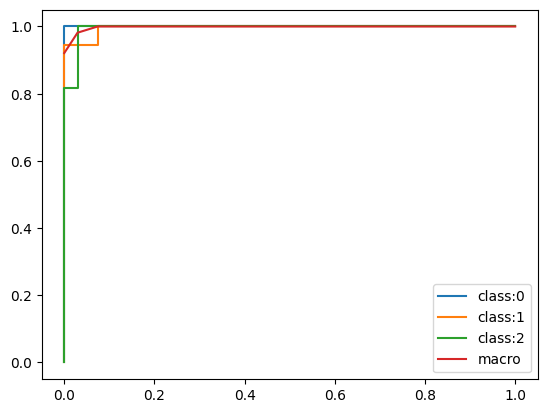

In [209]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.legend()

## micro平均

In [290]:
fpr['micro'], tpr['micro'], _ =  roc_curve(y_test_one_hot.ravel(),y_pred_proba.ravel() )
roc_auc['micro'] =  auc(fpr['micro'], tpr['micro'])

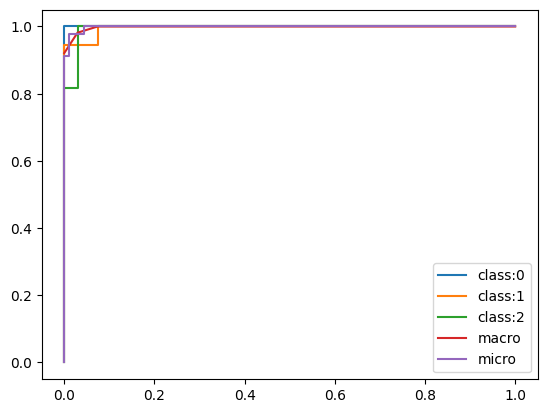

In [217]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
plt.plot(fpr['macro'], tpr['macro'], label='macro')
plt.plot(fpr['micro'], tpr['micro'], label='micro')

plt.legend()

## 多クラスROC

In [239]:
# データロード
df = sns.load_dataset('iris')
y_col='species'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression()
model.fit(X_train, y_train)
# 予想
y_pred_proba = model.predict_proba(X_test)

# macro平均

In [240]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=model.classes_)
n_classes = 3
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

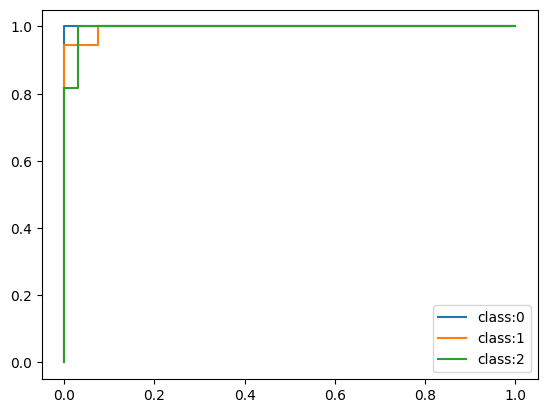

In [241]:
# それぞれのクラスのROC

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"class:{i}")
    plt.legend()

# np.interpの例

In [244]:
all_x = np.arange(7)
datta_x = [0, 2, 5, 6]
datta_y = [0, 2, 4, 6]
np.interp(all_x, data_x, data_y)

array([0.        , 1.        , 2.        , 2.66666667, 3.33333333,
       4.        , 6.        ])

In [274]:
# 必要なxの値のリスト
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# 線形補完
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr = mean_tpr / n_classes

In [275]:
mean_tpr

array([0.92087542, 0.98148148, 1.        , 1.        ])

In [277]:
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

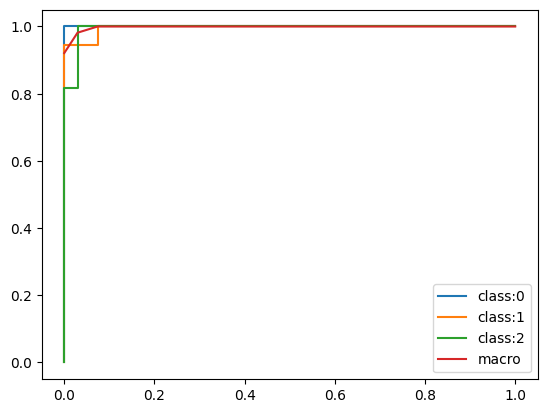

In [280]:
# それぞれのクラスとmacro平均のROC

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"class:{i}")
plt.plot(fpr['macro'], tpr['macro'],  label='macro')
plt.legend()

## macro平均

In [289]:
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_acu['micro'] = auc(fpr['micro'], tpr['micro'])

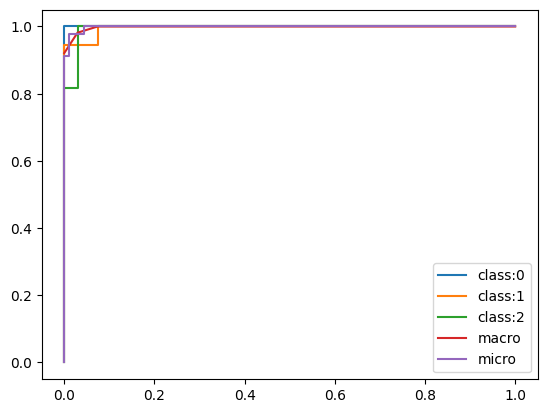

In [291]:
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"class:{i}")
plt.plot(fpr['macro'], tpr['macro'],  label='macro')
plt.plot(fpr['micro'], tpr['micro'],  label='micro')

plt.legend()